# Replies and Responses

On July 30, 2019, I sent email to both Dr. Kharinov and Purple Penguin with a 13 page PDF of the iPython notebook. On the next day, both replied. Here is exactly as they wrote.

### Dr. Kharinov

> Hello Doug Sweetser,

> I am not interested in computer exercises with quaternions and have not mastered a single CAS. 
Therefore, most of the content of your papers is not addressed to me.
In the first file, the second part of section 1.2 “A Real-Valued Quaternion Lorentz Boost” does not make sense. 
You still insist that you are describing all the rotations without using the rotational angle. 
My arguments about this also have not changed (see previous letters).
And physics has nothing to do with it, since the quaternion representation 
in it absolutely does not change anything.

>Regards.

>M.Kharinov  

### Purple Penguin

> I really do want to help you understand more, but I am unsure how to make progress. You continue to make new mistakes and move on before you take the time to learn from previous discussions. We never get anywhere this way, often cycling back to previous misunderstandings. What exactly do you want me to do?
 
> After reading, here are four main points.
 
> 1) You misunderstand Aaronson's argument. Please take the time to learn QM instead of superficially recreating equations you see in a book to have quaternions. I can help you learn more about QM, but you have to actually choose to seek this as the goal first. He is not using high level concepts here. You should be able to understand this if you take the time. It will be worth it.
 
> 1b) As Aaronson tried to explain to you (and I've tried repeatedly to explain as well), the "space" from which a vector describing the state of a qubit comes from is a Hilbert space, not the space of space-time. Taking the dual of a state vector is not mirroring or flipping in space-time. Likewise the presence of a conjugate in the norm doesn't mean there is something non-local going on.
 
> 2) The Lorentz group has 6 real degrees of freedom. We have discussed this at great length. We can discuss even more, but I'd appreciate if we could finally run this to ground and complete it.
 
> 3) You have redefined what a "solution" is, to the point where the result has lost all meaning. It is equivalent to claiming B' = B + h can define any transformation, if, as you say, I can make the solution "local".  This trivializes the concept of a "solution" to the point of being completely vacuous. 
 
> So, do you believe the transformation B' = B + h describes a rotation?
 
> Even better, if the components of h can be a function of the components of B, why even bother with B? Just declare the ultimate transformation
 B' = h
Tell me what you want B' to equal for a particular B and I'll give you the h which "solves" this transformation equation to make B' equal that.
This is completely vacuous.
 
> 4) If you are starting to consider a collection of four functions as components of a quaternion, this object is no longer a quaternion, but a different type of mathematical object.
 
> For example, for real number polynomials of one parameter, the set is R[x]. For complex polynomials of one parameter it would be C[x]. For quaternions, what is a polynomial may need a bit of defining since values do not commute, but would be H[x].
Note that these objects, or more general "quaternion of functions", would no longer be a division algebra.

These professionals are dismissive of the work contained in the notebook.

## The Kinetics of Disagreement

Our minds must do work to change. Change in the way a person thinks about physics takes the investment of both energy and time. David Pritchard of MIT studied how students ideas about physics changed before and after the traditional large lecture classes. What the data showed was that their understanding of physics _did not change at all_. The data lead to a compete redesign of freshmen physics at MIT. The sections were made tiny, with students arguing about their understanding of issues.

The rapid reply received from both Dr. Kharinov and Purple Penguin indicated they did not give themselves time to change their minds. In my own experience, I know it is easiest to reply quickly, citing earlier points I have made and adding new objections. I could have done that in this situation, but decided against it. 

I have noticed it takes from a few hours to a day and half before I can move around my own well-known-to-me objections and see some value in other's critiques. Such was the case here. Now I shift in to the several-weeks process of working my own mind. Since Dr. Kharinov claimed he had already said all he needed to, I will go back and read all those emails to see which are most relevant to the 1-way \$100 wager. There are a number of issues Purple Penguin raised which are fun to reflect upon.

After completing this notebook reply over the next month or two, I will retire from this conflict on the triple triple quaternion function and Lorentz transformations. I feel confident nothing I write here will change the mind of Dr. Kharinov or Purple Penguin, so that is not the goal. It is instead to document for myself and anyone else interested what I think are darn fun observations that get me to think differently about mathematical physics.

## Reframing the Work

Dr. Kharinov and I found the function using probably very similar steps, knowing ahead of time what a Lorentz boost along the x-axis looked like. Instead of starting there, I want to start back with the work by Rodrigues for rotations in 3D space, the group SO(3):
$$ R \rightarrow R' = u R u^* $$
where u is a unit quaternion so has a norm of one. The unit quaternions SU(2) are a double cover of SO(3). This is great for space. Minkowski realized that special relativity was a rotation in space-__time__. The goal is to now _generalize_ Rodrigues rotations so that the can also do the rotations that involve time. So long as at least one member of the group SU(2) in there, then rotations are covered.

There are only a small number of permutations one can try. Here is the extension of Rodrigues we both found: 
$$ R \rightarrow R' = u R u^* +\frac{1}{2}((u u R)^* - (u^* u^* R)^*)$$
For the case where u is purely imatinary (scalar=0), then $(u u R)^* - (u^* u^* R)^*=0$ and will cover all possible rotations. When u is not a purely imaginary number with a norm of unit, but instead has the form $u = (\cosh(\alpha), I \sinh(\alpha))$, then this function will do a Lorentz boost. Now the scalar has a minimum of one and its norm can become arbitrarily large.

This now looks like a clever generalization of Rodrigues' work of long ago.

## Dr. K: Mastering CAS

It is my practice to avoid jargon. I had to look up [CAS](https://en.wikipedia.org/wiki/Computer_algebra_system) which stands for Computer Algebra System. The driving goal of the Python language is readability. Even if one does not know how to write and use a python program, the hope is that enough can be read by a general audience to understand what is being done.

Technical note: For this very project, I decided for ease of reading to rearrange my core library. I renamed it from Q_tools to QH which stants for Quaternions by Hamilton, so the import command became "from QH import QH". This means that the way to create a quaternion known to Hamilton is just "new_q = QH([t, x, y, z])". There is nothing Earth-shattering about this. Instead it is about the work needed to make things simple enough so it is readible as is.

The import of libraries is not pretty and probably will never be. I repeat it here.

In [1]:
%%capture
%matplotlib inline
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import math
import unittest

# To get equations the look like, well, equations, use the following.
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from IPython.display import display

# Tools for manipulating quaternions written by D. Sweetser.
from QH import QH, QHStates

from IPython.core.display import display, HTML, Math, Latex
display(HTML("<style>.container { width:100% !important; }</style>"))

This was on page 3. I then used it to write out four quaternions using quaternion conjugates and give them a boost. For brevity, I will only include one example:

In [2]:
hpp = QH([0, 1/sp.sqrt(2), 1/sp.sqrt(2), 0])
hpp.print_state("hpp")
t, x, y, z = sp.symbols("t x y z")
txyz = QH([t, x, y, z])
txyz_hpp = txyz.rotation_and_or_boost(hpp).simple_q()
txyz_hpp.print_state("txyz_hpp")

hpp
(0, sqrt(2)/2, sqrt(2)/2, 0) 

txyz_hpp
(t, y, x, -z) 



The skeptical reader might want more information about the function rotation_and_or_boost(). That would require opening up the QH library and seeing that it does indeed implement the triple tripe quaternion function, $B \rightarrow B' = h B h^* + \frac{1}{2} ((h h B)^* - (h^* h^* B)^*)$. The details are available, so nothing is hidden. I would also prefer if the sqrt(2)/2 appeared in LaTeX as $\sqrt(2)/2$, but these display issues are an ongoing struggle. I hope most readers could quickly figure out what was done here.

If I reader decided to **play** with the notebook... and play is the key term, not trying to prove anything in any direction, just try out some random numbers in a boost with the first term equal to zero like so:

In [3]:
txyz.rotation_and_or_boost(QH([0, 2, 3, 5])).display_q("boost by (0, 2, 3, 5)")

boost by (0, 2, 3, 5)


Nope, this is not right, that 38t. One would realize that $38 = 2^2 + 3^2 + 5^3$, a normalization factor, so adjust for that:

In [4]:
txyz.rotation_and_or_boost(QH([0, 2/math.sqrt(38), 3/math.sqrt(38), 5/math.sqrt(38)])).display_q("boost by (0, 2, 3, 5)/math.sqrt(38)")

boost by (0, 2, 3, 5)/math.sqrt(38)


Is this really a rotation? The fact that the first term is unaltered is a requirement. Maybe the other three terms don't have the same norm? Just test it. 

norm squared


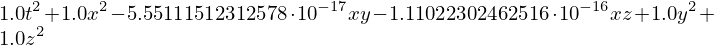

In [5]:
txyz.rotation_and_or_boost(QH([0, 2/math.sqrt(38), 3/math.sqrt(38), 5/math.sqrt(38)])).norm_squared().simple_q().display_q("norm squared")

There is a some rounding error going on, but otherwise it is exactly what is required. This looks like a totally random way to do a rotation. Therefore, how could one possibly restrict rotations? One way was the basis of the 1-way $ \$100 $ wager: insist that rotation around the $z$ axis is zero. _Without_ that restriction, I see nothing limiting where the rotation could be in 3D space.

Dr. Kharinov did not do this exercise and decided not to read anything after the statement of the problem, section 1.2 A Real-Valued Quaternion Lorentz Boost.

The [slides for Dr. Kharinov's work are available](https://pca-pdmi.ru/2019/files/22/KharinovSPIIRASlides.pdf). To do the work of the Lorentz group, on slide 3 he forms a composite function from the triple triple quaternion function and the rotation triple product. I must confess a bit of confusion on how he does this. In my own efforts, I specifically make clear there is a rejection of all the tools of tensor algebra as indicated by a lack of tensor indices. I do not see a similar statement here. The assertion that "the quaternion representation in it absolutely does not change anything" strikes me as odd as members of the Lorentz group are rank 2 tensors that act on other pairs tensors to lower their rank by 2 that may only be contracted using a metric tensor. In a typical example, two rank one tensors (vectors) are contracted to create a rank 0 scalar. In contrast, a quaternion multiplied by a quaternion can only result in another quaternion.

I do fault myself for some of our miscommunication. Every tool in my QH library returns a quaternion. That may not sound radical, but it is in its own way. Take the norm. In current usage, that means one number is returned. The quaternion function norm_squared() returns four. Granted that three of them are zero, but I did get into an argument with Dr. Kharinov over this kind of detail. What I have learned is to always preface vector algebra terms in wide use with the _quaternion_ qualifier. As another example, think of the cross product. My tools again have to return four numbers, the first one of a quaternion cross product always being zero. That will strike almost all as so wrong it is embarrassing. A cross product does have three components as is universally accepted. A quaternion cross product has four because it has to be a quaternion.

# Purple Penguin: Overview

The four points raised are all worthy of discussion. Yet he and I argue like an old couple, talking past each other and ignoring what the other has said. Both parties will claim they are the generous one.

To my biased eye, the most glaring omission was my documented demonstration that there was indeed a value of a quaternion parameter $h= \left(0, \frac{x - y}{\sqrt{2 x^2 + 2 y^2 + 4 z^2}} , \frac{x + y}{\sqrt{2 x^2 + 2 y^2 + 4 z^2}} , \frac{2 z}{\sqrt{2 x^2 + 2 y^2 + 4 z^2}} \right)$ that accomplishes this transformation: $B=(t, x, y, z) \rightarrow B' = (t, -y, x, z)$ for the triple triple quaternion function. Unless otherwise shown, I won my 1-way $100 wager.

Again, part of this problem squarely lands on my unsophisticated shoulders.  People well-trained in the craft of mathematical physics really want to hear a claim explained in their dialect of jargon. Fortunately in this very case this has been done in 2012 at physics.stackexchange.com in the thread [Is-this-a-quaternion-lorentz-boost?](https://physics.stackexchange.com/questions/28797/is-this-a-quaternion-lorentz-boost#). At that time, I was blogging regularly at Science20.com. One reader (MadScientist) of my many columns there got particularly interested in the claim about the Lorentz group and the triple triple quaternion product. The first response was from Qmechanic who recognized as that if $h=(\cosh(x), \sinh(x), 0, 0)$, boosts can be represented but not rotations. It was a year later that I first recognized if $|h|=1$ and $h = (0, a, b, c)$ then rotations could be done because the second and third term of the triple triple product cancel leaving one with a rotation operator that Qmechanic had in his reply. Unfortunately I don't have enough "reputation" points to add this addendum. Ron Maimon provided the second answer that claims to cover the whole Lorentz group. His approach used the Dirac representation of gamma matrices. Since the Dirac matrices are a factor of $i$ away from the quaternions, this should be a bridge others can walk over. Note that I agree with Ron Maimon that one doesn't get something new per se, only that the task can be done.

## Purple Penguin, 1a

> 1) You misunderstand Aaronson's argument. Please take the time to learn QM instead of superficially recreating equations you see in a book to have quaternions. I can help you learn more about QM, but you have to actually choose to seek this as the goal first. He is not using high level concepts here. You should be able to understand this if you take the time. It will be worth it.

For those unfamiliar with this research project I have, it is [available on github](https://github.com/dougsweetser/QM). The intent is to follow along with the book "Quantum Mechanics: The Theoretical Minimum" (QMTTM) by Leonard Susskind and Art Friedman, making sure all expressions can be recreated using quaternion series (a semi-group with inverses). 

One can see this as a generous offer for assistence. I do read it that way. My own experience says that would not be effective. In the early 1990s, as I worked as a biology lab technician at the Harvard School of Public Health, I was able to audit a full year of undergraduate quantum mechanics followed by a second year of graduate level quantum mechanics (relativisitic quantum field theory, doing Feynman scattering calculations and similar things). That is the kind of time investment required to learn the details of quantum mechanics. It is clear that over three decades, most details needed for detailed calculations have been lost, like I know that there are selection rules required for scattering calculations, but I could not write one down.

Demonstrating that quaternion series behave exactly as the complex-valued Hilbert space is often straight forward. Take for example that the Hilbert space is linear. If one chooses to call my replication of that effort superficial, that is a judgment call you are free to make. I recall the same sorts of basic steps are done in technical books on quantum mechanics. Basic stuff is easy but still needs to be done.

Let me describe a non-trivial case. There is an identity in complex-valued quantum mechanics with operators, the dagar operator, and a state:
$$ <A|M^\dagger = M|A> $$
It is easy for me to imagine someone with formal training to immediately claim such an identity will fail because quaternions do not commute. In a quaternion product, the only part that does not commute is the cross product. The cross product anti-commutes. An anti-anti-commutes is the same as something that commutes. 

Getting this to work in practice was not superficial. It was quite gratifying that my refactoring of the QH library had this particular proof to just work. I am almost exactly 1/3 through what I consider to be the basic steps one has to do at a minimum, the ten chapters of Susskind and Friedman's book.

Let's accept this assertion that Aaronson is not doing anything fancy. So I will spell the basics out, and maybe someone will point out where my basic understanding of quantum mechanics is flawed. Let me start with a spin 2 complex-valued state living in a quaternion structure.

In [6]:
a0, a1, b0, b1 = sp.symbols("a0 a1 b0 b1")
φ = QHStates([QH([a0, a1, 0, 0]), QH([b0, b1, 0, 0])])
φ.print_state("φ")

φ
n=1: (a0, a1, 0, 0) 
n=2: (b0, b1, 0, 0) 
ket: 2/1



A basic property of a spin state is that its norm squared is a positive real number so long as the spin state is not zero. Show this:

In [7]:
norm_squared_φ = φ.bra().product(φ)
norm_squared_φ.display_q("|<φ|φ>|²")

|<φ|φ>|²
n=1


This is a positive real number as required.

Aaronson wrote out two operators to act on a spin state. The two operators have two rows and two columns.

In [8]:
U = QHStates([QH().q_1(), QH().q_0(), QH().q_0(), QH().q_j()], qs_type="op")
V = QHStates([QH().q_1(), QH().q_0(), QH().q_0(), QH().q_i()], qs_type="op")

U.print_state("U")
print("Is U Hermitian?: ", U.is_Hermitian(), "\n")
V.print_state("V")
print("Is V Hermitian?: ", V.is_Hermitian(), "\n")

U
n=1: (1, 0, 0, 0) 
n=2: (0, 0, 0, 0) 
n=3: (0, 0, 0, 0) 
n=4: (0, 0, 1, 0) 
op: 2/2

Is U Hermitian?:  False 

V
n=1: (1, 0, 0, 0) 
n=2: (0, 0, 0, 0) 
n=3: (0, 0, 0, 0) 
n=4: (0, 1, 0, 0) 
op: 2/2

Is V Hermitian?:  False 



A basic thing one learns in standard quantum mechanics is that **trace of operators must be real** in order to be an observable. Take the trace.

In [9]:
U.trace().print_state("tr(U)")
V.trace().print_state("tr(V)")

tr(U)
n=1: (1, 0, 1, 0) 
scalar: 1/1

tr(V)
n=1: (1, 1, 0, 0) 
scalar: 1/1



Neither of these are real valued. They are not observable. Yet Aaronson writes:

> We can calculate that, if Alice applies U to her qubit and then Bob applies V to his qubit, Bob will be left with the state

This is where I stop. This looks like a first-year undergraduate mistake. Alice's qubit is observable. Act on it with an operator that is not Hermitian and the result is a state that is not observable. Am I wrong about this point? Aaronson cited a pre-print paper that did a near identical thing. I did email that guy but he did not reply. Such is my power.

In contrast, create two quaternion series that are Hermitian and use those in a calculation:

In [10]:
W = QHStates([QH().q_1(), QH().q_j(), QH().q_j(-1), QH().q_1(-1)], qs_type="op")
Z = QHStates([QH().q_0(), QH().q_i(), QH().q_i(-1), QH().q_0()], qs_type="op")

W.print_state("W")
print("Is W Hermitian?: ", W.is_Hermitian(), "\n")
Z.print_state("Z")
print("Is Z Hermitian?: ", Z.is_Hermitian())

W
n=1: (1, 0, 0, 0) 
n=2: (0, 0, 1, 0) 
n=3: (0, 0, -1, 0) 
n=4: (-1, 0, 0, 0) 
op: 2/2

Is W Hermitian?:  True 

Z
n=1: (0, 0, 0, 0) 
n=2: (0, 1, 0, 0) 
n=3: (0, -1, 0, 0) 
n=4: (0, 0, 0, 0) 
op: 2/2

Is Z Hermitian?:  True


Now have these four operators act on the spin state. It is expected that $U$ and $V$ will be complex valued but $W$ and $Z$ will be real.

In [11]:
φ.bra().product(U).product(φ).print_state("<φ|U φ>")
φ.bra().product(V).product(φ).print_state("<φ|V φ>")
φ.bra().product(W).product(φ).print_state("<φ|W φ>")
φ.bra().product(Z).product(φ).print_state("<φ|Z φ>")

<φ|U φ>
n=1: (a0**2 + a1**2, 0, b0**2 - b1**2, -2*b0*b1) 
scalar: 1/1

<φ|V φ>
n=1: (a0**2 + a1**2, b0**2 + b1**2, 0, 0) 
scalar: 1/1

<φ|W φ>
n=1: (a0**2 + a1**2 - b0**2 - b1**2, 0, 0, 0) 
scalar: 1/1

<φ|Z φ>
n=1: (2*a0*b1 - 2*a1*b0, 0, 0, 0) 
scalar: 1/1



In the blog, Alice was in the state $|1>$ while Bob was in the state $|+>$. These are not entangled states. One could pick appropriate values for a0, a1, b0, and b1 to make that so. No matter what choices are made for the representation, with Hermitian operators $W$ and $Z$, the result of forming the inner product is a real number. One cannot use non-Hermitian operator like $U$ and $V$ to do any basic calculations in quantum mechanics.

## Purple Penguin 1b

> 1b) As Aaronson tried to explain to you (and I've tried repeatedly to explain as well), the "space" from which a vector describing the state of a qubit comes from is a Hilbert space, not the space of space-time. Taking the dual of a state vector is not mirroring or flipping in space-time. Likewise the presence of a conjugate in the norm doesn't mean there is something non-local going on.

I would agree that today one does not have a physical interpretation of what is going on in quantum mechanics. Like many other people, I find that situation unacceptable in the long term. What I am working on is an effort to make the abstract art of quantum mechanics into something concrete. Space-like separated events look to my eye like non-local events. Local events will be connected by time-like relationships. That is how I view a wave function, a collection of time-like events. Every event in the conjugate of the wave function is space-like separated from the original wave function. That is a simple math fact that should be trivial to show. That is what the conjugation does for quaternion series quantum mechanics. One needs both the wave function and its conjugate to have a Hilbert space for quaternion series quantum mechanics.

You don't accept that. Fine, this is ongoing research.

## Purple Penguin 2: 6

> 2) The Lorentz group has 6 real degrees of freedom. We have discussed this at great length. We can discuss even more, but I'd appreciate if we could finally run this to ground and complete it.

All I need to do is listen to others and I will finally understand that three rotational degrees of freedom plus three boost degrees of freedom equals six degrees of freedom. This has been taught by so many people so many times it is absolutely right. This can also be understood with group theory, starting with the three dimensional rotation group $SO(3)$ and adding on three boosts. It is almost painfully obvious that if one wants to do more than just rotations but also boosts, one will need more degrees of freedom.

In the initial reply, I came up with two new lines of arguments. These novel perspectives were formally ignored by Purple Penguin. This is the sign of old couple argument.

In a game of minimization, smaller wins. Sure, six degrees of freedom can be used to cover all possible inertial ways to transform the quaternion $B$ into $B'$. One new line of reasoning involved a Mathematician who knew nothing of physics. This is an exercise in abstraction. The history of how Lorentz developed his transformation is ignored. Einstein's epic papers on special relativity in 1905 are ignored. Reduce everything down to a simple math question: there are two quaternions with different values, $B$ into $B'$. When they get squared, the first terms are equal. Since quaternions have four degrees of freedom and the equality of the squared first term is one constraint, the problem only has three degrees of freedom.

The above logic sounds simple, direct, and unassailable. It can and was ignored. Why? "We can discuss it even more...", so let me do that, show I have an appreciation of the standard approach to quantifying the number of degrees of freedom.

The Lorentz group is a continuous Lie group $SO(3, 1)$. A Lie algebra associated with this group is $so(3, 1)$. And as happens in this area of math, the same Lie algebra is associated with other Lie groups such as $SO(3, 1)$, and $SO^+(3, 1)$.  Write out an explicit real [4x4 matrix representation of this Lie algebra](https://en.wikipedia.org/wiki/Lorentz_group#Lie_algebra):

$$so(1,3) = \begin{pmatrix}
0 & a & b & c \\
a & 0 & d & e \\
b & -d & 0 & f \\
c & -e & -f & 0
\end{pmatrix} $$

Notice there are six independent variables. This is a way to see why the Lorentz group has six degrees pf freedom because its Lie algebra has six degrees of freedom. If $a=b=c=0$:

$$so(3) = \begin{pmatrix}
0 & 0 & 0 & 0 \\
0 & 0 & d & e \\
0 & -d & 0 & f \\
0 & -e & -f & 0
\end{pmatrix} $$

This Lie algebra $so(3)$ is associated with the 3D rotation group $SO(3)$. With $d$, $e$, and $f$ doing the work of rotations, the work of boosts is done by $a$, $b$, and $c$. This story is very clear, very simple, and very right. Certainly the subject can get complicated when one is thinking about an infinite dimensional vector space acting on a Hilbert space as needed in quantum mechanics, but the basics are the basics.

The game of minimalism is not one people are accustom to playing. Some would not even allow it (the favorite ploy being to ignore a line of reasoning). Still, it is my intent to play a minimalism game. My opening move in this game is legal but odd - imagine the situation when $a=f$, $b=e$, and $c=-d$. In that most unusual but possible situation:

$$so(1,3)_{\rm{odd}} = \begin{pmatrix}
0 & a & b & c \\
a & 0 & -c & b \\
b & c & 0 & -a \\
c & -b & a & 0
\end{pmatrix} $$

Hit this with a matrix filled with a constant matrix filled with 0, 1, and -1's such that the top line gets negated and all other terms are left the same:

$$so(1,3)_{\rm{odd-twist}} = \begin{pmatrix}
0 & -a & -b & -c \\
a & 0 & -c & b \\
b & c & 0 & -a \\
c & -b & a & 0
\end{pmatrix} = Q(0, a, b, c)$$

The odd-twist matrix is now a quaternion. A reed-thin link between the Lie algebra $so(1, 3)$ and quaternions has been built if and only if $a=f$, $b=e$, and $c=-d$. Many may consider such a link beyond dull since it is so rare. 


In every case of practical interest, it will not be the case that $a=f$, $b=e$, and $c=-d$. One can do a rotation without a boost. One can do a boost without a rotation. 

Here is the observation that made me be at peace with this situation. Can one do physics using only space-time? The answer is no, not classical physics or quantum mechanics. Space-time is a base-space. This is where things are when. It has no information about energy or momentum. That requires a tangent space. There are many different types of tangent spaces each of which leads to different branches of physics. If the tangent space is energy-momentum, then together the path of particles can be described. Quantum mechanics has a similar structure with Hamiltonians except that one also needs a Hilbert space.

In which space do the rotations happen? Rotations are ratios of lengths. Therefore this must happen in space-time. The norm for the quaternion _h_ must be one _and_ the real valued term must be zero. Rotations have three degrees of freedom.

In which space do the boosts that require velocities happen? These happen in energy-momentum space. The norm of the quaternion _h_ must be zero and the first term must be equal to or greater than one. Whether a boost _also_ does a rotaion depends on if the boost and the quaternion it acts on commutes. If they commute, the result will be a pure boost. If not, the transformation is both a boost and a rotation.

To do inertial transformations, the stuff of special relativity, does require three degrees of freedom in space-time for rotations and three degrees of freedom in energy-momentum for boosts, for a total of six degrees of freedom. The one triple, triple quaternion function can do both of these tasks. The first term of the triple triple function was known to Rodrigues in the 1840s. About a hundred and seventy years later I found two additional terms that cancel if the scalar is zero but can do the work of Lorentz boosts if the first term is one or larger and the norm is unity. Progress can be slow.

## Closure for Rotations and Boosts

One of the beauties of the Lorentz group is how if one has two members, it is easy enough to generate a third by multiplying them together. It was clear early on how to do this for rotations: take any two quaternions and form the quaternion cross product that must then be normalized. Note that if the cross product is zero because the two are pointing in the same direction in space, then return one of them instead as an identity transformation. Because of the normalization step at the end, _all_ quaternions can be used to generate a new member of the rotation group.

In [12]:
q1234 = QH([1, 2, 3, 4])
q5678 = QH([5, 6, 7, 8])
next_rotation = q1234.Lorentz_next_rotation(q5678)
next_rotation.print_state("next rotation")
next_rotation.norm_squared().print_state("next rotation norm squared")
txyz.rotation_and_or_boost(next_rotation).simple_q().print_state("txyz rotated")
txyz.rotation_and_or_boost(next_rotation).square().simple_q().print_state("txyz rotated and squared")

next rotation
(0.0, -0.408248290463863, 0.816496580927726, -0.408248290463863) 

next rotation norm squared
(0.9999999999999999, 0, 0, 0) 

txyz rotated
(1.0*t, -0.666666666666667*x - 0.666666666666667*y + 0.333333333333333*z, -0.666666666666667*x + 0.333333333333333*y - 0.666666666666667*z, 0.333333333333333*x - 0.666666666666667*y - 0.666666666666667*z) 

txyz rotated and squared
(1.0*t**2 - 1.0*x**2 - 1.0*y**2 - 1.0*z**2, t*(-1.33333333333333*x - 1.33333333333333*y + 0.666666666666667*z), t*(-1.33333333333333*x + 0.666666666666667*y - 1.33333333333333*z), t*(0.666666666666667*x - 1.33333333333333*y - 1.33333333333333*z)) 



As promised, plugging in two quaternions will generate a new quaternion with a zero scalar and a norm of unity. This quaternion does do a rotation, not a boost as seen by the scalar of txyz rotated being unchanged.

The bigger puzzle for me was to find the next boost given two other boosts. It was a problem I couldn't come up with a way to even work on it. Yet it bothered me for quite some time. The easy problem used the odd product of two quaternions. It eventually occured to me that it would be very nice if the even product of two quaternion could be used to find the next boost. The even product as per usual creates a real valued scalar and three imaginaries. Use the scalar as the rapidity, and a normalized 3-vector to form a quaternion of the form $h = (\cosh(\alpha), I \sinh(\alpha))$. Again one can start with any pair of quaternions and generate the next boost.

In [13]:
next_boost = q1234.Lorentz_next_boost(q5678)
next_boost.print_state("next boost")
next_boost.norm_squared().print_state("next boost norm squared")
txyz.rotation_and_or_boost(next_boost).simple_q().print_state("txyz boosted")
txyz.rotation_and_or_boost(next_boost).square().simple_q().print_state("txyz boosted and squared")

next boost
(1.0001388921039391, -0.0068311898429209775, -0.009392886034016345, -0.01195458222511171) 

next boost norm squared
(1.00055560699779, 0, 0, 0) 

txyz boosted
(1.00055560699779*t + 0.0136642772825013*x + 0.0187883812634393*y + 0.0239124852443773*z, 0.0136642772825013*t + 1.00009333030934*x + 0.000128329175342574*y + 0.000163328041345095*z, 0.0187883812634393*t + 0.000128329175342574*x + 1.0001764526161*y + 0.000224576056849503*z, 0.0239124852443773*t + 0.000163328041345095*x + 0.000224576056849503*y + 1.00028582407235*z) 

txyz boosted and squared
(1.0*t**2 + 9.87640416498514e-19*t*x + 1.44842633980485e-18*t*y - 1.0*x**2 - 8.43261003661059e-19*x*y - 4.98732999343332e-18*x*z - 1.0*y**2 + 1.78893358460108e-18*y*z - 1.0*z**2, 2*(0.0136642772825013*t + 1.00009333030934*x + 0.000128329175342574*y + 0.000163328041345095*z)*(1.00055560699779*t + 0.0136642772825013*x + 0.0187883812634393*y + 0.0239124852443773*z), 2*(0.0187883812634393*t + 0.000128329175342574*x + 1.0001764526161*y 

This calculation has more rounding error, but hopefully the reader sees the big picture. The next boost has a scalar that is greater than unity so its norm likewise is greater than unity. The scalar for txyz boosted and squared is, up to these rounding errors, unchanged as it must be.

It would not be wise to become to enamoured by these particular implementations of finding another member of the Lorentz group, wether it be a rotation or a boost. There are an infinite number of functions one could construct. One question I had was if I could combine these two functions, Lorentz_next_rotation() and Lorentz_next_boost(), two do both. In my limited efforts, one thing I noticed was that the products of these two functions when given the same two quaternions are at right angles to each other. This makes sense because one is the odd product, and the other the even product. Odd and even products of the same imput are always at right angles.

In conclusion, one can do rotations or boosts with the generalized rotation function defined here. Given two rotations or two boosts, a third can be found by direct calculation.

## Purple Penguin 3: Empty Solutions

    3) You have redefined what a "solution" is, to the point where the result has lost all meaning. It is equivalent to claiming B' = B + h can define any transformation, if, as you say, I can make the solution "local". This trivializes the concept of a "solution" to the point of being completely vacuous.

    So, do you believe the transformation B' = B + h describes a rotation?

    Even better, if the components of h can be a function of the components of B, why even bother with B? Just declare the ultimate transformation B' = h Tell me what you want B' to equal for a particular B and I'll give you the h which "solves" this transformation equation to make B' equal that. This is completely vacuous.

This was a great question, fun to think about and code against. If we were to eliminate local theories, that would remove both the standard model and general relativity. Not much is left to do after those two are gone! Those two theories are broad to the point of being crazy in ways we do not focus upon. In relativistic quantum field theory, we not only have to account for what a particle does in the future, but also have to add in its antiparticle moving into the past. In general relativity, all energy and momentum no matter how big or small should in theory get plugged into the calculation. In all the discussion that follows, I am thinking about Lorentz calculations in the general context, not the precisely constrained ways of special relativity with rotations and boosts using the generalized rotation quaternion function.

I am not allowed to change either: the definition of a Lorentz transformation nor the 8 tests for rotations. There is no issue of "belief", there is only a test and the result. See if $B \rightarrow B'=B+h$ can do rotations.

In [14]:
txyz_hpp.conj_q(QH([True, True, True, False])).print_state("#1 hpp * *1 *2", spacer=False)
txyz.add(QH([0, -x + y, x - y, 0])).print_state("txyz + (0, -x + y, x - y 0)")

#1 hpp * *1 *2
(t, y, x, z) 
txyz + (0, -x + y, x - y 0)
(t, y, x, z) 



It will be a surprise to no one that this approach works for all 8 tests.

In [15]:
txyz_hpp.conj_q(QH([False, False, False, False])).print_state("#2 hpp", spacer=False)
txyz.add(QH([0, -x + y, x - y, -2 * z])).print_state("txyz + (0, -x + y, x - y, -2 * z)")

txyz_hpp.conj_q(QH([True, False, True, True])).print_state("#3 hpp * *2 *-1", spacer=False)
txyz.add(QH([0, -x - y, x - y, 0])).print_state("txyz + (0, -x - y, x - y, 0)")

txyz_hpp.conj_q(QH([False, True, False, True])).print_state("#4 hpp *1 *-1", spacer=False)
txyz.add(QH([0, -x - y, x - y, -2 * z])).print_state("txyz + (0, -x - y, x - y, -2 * z)")

txyz_hpp.conj_q(QH([True, True, False, True])).print_state("#5 hpp * *1 *-1", spacer=False)
txyz.add(QH([0, -x + y, -x - y, 0])).print_state("txyz + (0, -x + y, -x - y, 0)")

txyz_hpp.conj_q(QH([False, False, True, True])).print_state("#6 hpp *2 *-1", spacer=False)
txyz.add(QH([0, -x + y, -x - y, -2 * z])).print_state("txyz + (0, x + y, -x - y, -2 * z)")

txyz_hpp.conj_q(QH([True, False, False, False])).print_state("#7 hpp *", spacer=False)
txyz.add(QH([0, -x - y, -x - y, 0])).print_state("txyz + (0, -x + y, x - y, 0)")

txyz_hpp.conj_q(QH([False, True, True, False])).print_state("#8 hpp *1 *2", spacer=False)
txyz.add(QH([0, -x - y, -x - y, -2 * z])).print_state("txyz + (0, -x - y, -x - y, -2 * z)")

#2 hpp
(t, y, x, -z) 
txyz + (0, -x + y, x - y, -2 * z)
(t, y, x, -z) 

#3 hpp * *2 *-1
(t, -y, x, z) 
txyz + (0, -x - y, x - y, 0)
(t, -y, x, z) 

#4 hpp *1 *-1
(t, -y, x, -z) 
txyz + (0, -x - y, x - y, -2 * z)
(t, -y, x, -z) 

#5 hpp * *1 *-1
(t, y, -x, z) 
txyz + (0, -x + y, -x - y, 0)
(t, y, -x, z) 

#6 hpp *2 *-1
(t, y, -x, -z) 
txyz + (0, x + y, -x - y, -2 * z)
(t, y, -x, -z) 

#7 hpp *
(t, -y, -x, z) 
txyz + (0, -x + y, x - y, 0)
(t, -y, -x, z) 

#8 hpp *1 *2
(t, -y, -x, -z) 
txyz + (0, -x - y, -x - y, -2 * z)
(t, -y, -x, -z) 



This completes the _proof_ that addition can be used to do a spatial rotation in space-time.

Is this _vacuous_? That question, my tiny audience, may be interesting. Addition is a binary function, taking in two quaternions and spits back one that is different. Many functions are unary, taking one and changing it. The problem description only stipulates that $B'$ is different from $B$. I created a new function that would scale the result in a way so that the squared interval was the same, Lorentz_by_scaling(). Give it a try.

In [16]:
q1234.square().print_state("q1234²")

q1234_sine = q1234.Lorentz_by_rescaling(q1234.sin)
q1234_sine.print_state("sine(q1234)")
q1234_sine.square().print_state("sine(q1234)²")

q1234²
(-28, 4, 6, 8) 

sine(q1234)
(6.9021129048863, 1.6458584407975525, 2.468787661196329, 3.291716881595105) 

sine(q1234)²
(28.0, 22.719801567689665, 34.0797023515345, 45.43960313537933) 



Scaling changed the interval from a space-like interval to a time-like one.

Why does rescaling work with the sine function, or with almost any other familiar unary function? The input has four degrees of freedom in the quaternion. There is only one constraint on the output: that the magnitude of the first term of the square before and after remains the same. As the question is ask today - ignoring space-times-time - means that rescaling will work for unary functions.

At this time, I know of only two uses for space-times-time. In special relativity, for two inertial observers that agree on the interval between two events, an analysis of space-times-time can provide information about their relative motion. For two uncharged, non-spinning observers in different locations near a gravitational source, their space-times-time values will agree. Beyond these two cases, I don't know how to use space-times-time in practical calculations. I can conceed that taking the hyperbolic arctangent of an event and rescaling it sounds like a vacuous exercise. Yet I am not arrogant enough to assert there will be no situations in the future of physics where a physical constraint on space-times-time may lead to putting this math observation to use.

Vacuums are the subject of much interesting research. One will have to be patient to see if this far more general view on transformations that preserve the first term of the square ever is interesting. For me it is an open question. I am at peace if my small audience is passionately dismissive.

## Purple Penguin 4: The Quaternion Collection

    4) If you are starting to consider a collection of four functions as components of a quaternion, this object is no longer a quaternion, but a different type of mathematical object.

    For example, for real number polynomials of one parameter, the set is R[x]. For complex polynomials of one parameter it would be C[x]. For quaternions, what is a polynomial may need a bit of defining since values do not commute, but would be H[x]. Note that these objects, or more general "quaternion of functions", would no longer be a division algebra.

The first part of this question struck me as a defense against a particular Lorentz transformation, the one I imagine Purple Penguin considered for the transformation of $(t, x, y, z) \rightarrow (t, -y, x, z)$. The easiest one looks like this:
$$ Twisted_{\mu \nu} = \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & -1 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1
\end{pmatrix} $$
Notice how each term is isolated from the other. This is what this matrix is doing - each term is grabbed indpendent of any other, and operated on. Exactly the same thing can be done with the QH library that only knows how to act on quaternions, no other sorts of mathematical objects. First show how to isolate each term.

In [17]:
txyz.add(txyz.conj()).product(QH([1/2, 0, 0, 0])).print_state("Isolate t")
txyz.add(txyz.conj(1)).product(QH([1/2, 0, 0, 0])).print_state("Isolate x")
txyz.add(txyz.conj(2)).product(QH([1/2, 0, 0, 0])).print_state("Isolate y")
txyz.add(txyz.conj().conj(1).conj(2).flip_signs()).product(QH([1/2, 0, 0, 0])).print_state("Isolate z")

Isolate t
(1.0*t, 0, 0, 0) 

Isolate x
(0, 1.0*x, 0, 0) 

Isolate y
(0, 0, 1.0*y, 0) 

Isolate z
(0, 0, 0, 1.0*z) 



Shifting the $x$ and $y$ around is direct enough using a factor of $k$ with the right sign:

In [18]:

txyz.add(txyz.conj(1)).product(QH([0, 0, 0, -1/2])).print_state("rotate x")
txyz.add(txyz.conj(2)).product(QH([0, 0, 0, -1/2])).print_state("rotate y")

rotate x
(0, 0, 1.0*x, 0) 

rotate y
(0, -1.0*y, 0, 0) 



Add these together in one operation from the QH library:

In [19]:
txyz.add(txyz.conj()).product(QH([1/2, 0, 0, 0])).add(\
txyz.add(txyz.conj(1)).product(QH([0, 0, 0, -1/2]))).add(\
txyz.add(txyz.conj(2)).product(QH([0, 0, 0, -1/2]))).add(\
txyz.add(txyz.conj().conj(1).conj(2).flip_signs()).product(QH([1/2, 0, 0, 0]))).print_state("conjugate isolation power")

conjugate isolation power
(1.0*t, -1.0*y, 1.0*x, 1.0*z) 



At no point in this process was the quaternion txyz not a quaternion. Again it is easy enough to "get all 8".

In [20]:
txyz_hpp.conj_q(QH([True, True, True, False])).print_state("#1 hpp * *1 *2", spacer=False)
txyz.add(txyz.conj()).product(QH([1/2, 0, 0, 0])).add(\
txyz.add(txyz.conj(1)).product(QH([0, 0, 0, -1/2]))).add(\
txyz.add(txyz.conj(2)).product(QH([0, 0, 0, 1/2]))).add(\
txyz.add(txyz.conj().conj(1).conj(2).flip_signs()).product(QH([1/2, 0, 0, 0]))).print_state("txyz: 1/2, -1/2k, 1/2k, 1/2")

txyz_hpp.conj_q(QH([False, False, False, False])).print_state("#2 hpp", spacer=False)
txyz.add(txyz.conj()).product(QH([1/2, 0, 0, 0])).add(\
txyz.add(txyz.conj(1)).product(QH([0, 0, 0, -1/2]))).add(\
txyz.add(txyz.conj(2)).product(QH([0, 0, 0, 1/2]))).add(\
txyz.add(txyz.conj().conj(1).conj(2).flip_signs()).product(QH([-1/2, 0, 0, 0]))).print_state("txyz: 1/2, -1/2k, 1/2k, -1/2")

txyz_hpp.conj_q(QH([True, False, True, True])).print_state("#3 hpp * *2 *-1", spacer=False)
txyz.add(txyz.conj()).product(QH([1/2, 0, 0, 0])).add(\
txyz.add(txyz.conj(1)).product(QH([0, 0, 0, -1/2]))).add(\
txyz.add(txyz.conj(2)).product(QH([0, 0, 0, -1/2]))).add(\
txyz.add(txyz.conj().conj(1).conj(2).flip_signs()).product(QH([1/2, 0, 0, 0]))).print_state("txyz: 1/2, -1/2k, -1/2k, 1/2")

txyz_hpp.conj_q(QH([False, True, False, True])).print_state("#4 hpp *1 *-1", spacer=False)
txyz.add(txyz.conj()).product(QH([1/2, 0, 0, 0])).add(\
txyz.add(txyz.conj(1)).product(QH([0, 0, 0, -1/2]))).add(\
txyz.add(txyz.conj(2)).product(QH([0, 0, 0, -1/2]))).add(\
txyz.add(txyz.conj().conj(1).conj(2).flip_signs()).product(QH([-1/2, 0, 0, 0]))).print_state("txyz: 1/2, -1/2k, -1/2k, -1/2")

txyz_hpp.conj_q(QH([True, True, False, True])).print_state("#5 hpp * *1 *-1", spacer=False)
txyz.add(txyz.conj()).product(QH([1/2, 0, 0, 0])).add(\
txyz.add(txyz.conj(1)).product(QH([0, 0, 0, 1/2]))).add(\
txyz.add(txyz.conj(2)).product(QH([0, 0, 0, 1/2]))).add(\
txyz.add(txyz.conj().conj(1).conj(2).flip_signs()).product(QH([1/2, 0, 0, 0]))).print_state("txyz: 1/2, 1/2k, 1/2k, 1/2")

txyz_hpp.conj_q(QH([False, False, True, True])).print_state("#6 hpp *2 *-1", spacer=False)
txyz.add(txyz.conj()).product(QH([1/2, 0, 0, 0])).add(\
txyz.add(txyz.conj(1)).product(QH([0, 0, 0, 1/2]))).add(\
txyz.add(txyz.conj(2)).product(QH([0, 0, 0, 1/2]))).add(\
txyz.add(txyz.conj().conj(1).conj(2).flip_signs()).product(QH([-1/2, 0, 0, 0]))).print_state("txyz: 1/2, 1/2k, 1/2k, -1/2")

txyz_hpp.conj_q(QH([True, False, False, False])).print_state("#7 hpp *", spacer=False)
txyz.add(txyz.conj()).product(QH([1/2, 0, 0, 0])).add(\
txyz.add(txyz.conj(1)).product(QH([0, 0, 0, 1/2]))).add(\
txyz.add(txyz.conj(2)).product(QH([0, 0, 0, -1/2]))).add(\
txyz.add(txyz.conj().conj(1).conj(2).flip_signs()).product(QH([1/2, 0, 0, 0]))).print_state("txyz: 1/2, 1/2k, -1/2k, 1/2")

txyz_hpp.conj_q(QH([False, True, True, False])).print_state("#8 hpp *1 *2", spacer=False)
txyz.add(txyz.conj()).product(QH([1/2, 0, 0, 0])).add(\
txyz.add(txyz.conj(1)).product(QH([0, 0, 0, 1/2]))).add(\
txyz.add(txyz.conj(2)).product(QH([0, 0, 0, -1/2]))).add(\
txyz.add(txyz.conj().conj(1).conj(2).flip_signs()).product(QH([-1/2, 0, 0, 0]))).print_state("txyz: 1/2, 1/2k, -1/2k, 1/2")

#1 hpp * *1 *2
(t, y, x, z) 
txyz: 1/2, -1/2k, 1/2k, 1/2
(1.0*t, 1.0*y, 1.0*x, 1.0*z) 

#2 hpp
(t, y, x, -z) 
txyz: 1/2, -1/2k, 1/2k, -1/2
(1.0*t, 1.0*y, 1.0*x, -1.0*z) 

#3 hpp * *2 *-1
(t, -y, x, z) 
txyz: 1/2, -1/2k, -1/2k, 1/2
(1.0*t, -1.0*y, 1.0*x, 1.0*z) 

#4 hpp *1 *-1
(t, -y, x, -z) 
txyz: 1/2, -1/2k, -1/2k, -1/2
(1.0*t, -1.0*y, 1.0*x, -1.0*z) 

#5 hpp * *1 *-1
(t, y, -x, z) 
txyz: 1/2, 1/2k, 1/2k, 1/2
(1.0*t, 1.0*y, -1.0*x, 1.0*z) 

#6 hpp *2 *-1
(t, y, -x, -z) 
txyz: 1/2, 1/2k, 1/2k, -1/2
(1.0*t, 1.0*y, -1.0*x, -1.0*z) 

#7 hpp *
(t, -y, -x, z) 
txyz: 1/2, 1/2k, -1/2k, 1/2
(1.0*t, -1.0*y, -1.0*x, 1.0*z) 

#8 hpp *1 *2
(t, -y, -x, -z) 
txyz: 1/2, 1/2k, -1/2k, 1/2
(1.0*t, -1.0*y, -1.0*x, -1.0*z) 



It is important to my way of doing physics to not grade whether this is a "good" solution. Solutions are binary: it is or it is not. This is a solution.

I am not going to dive too deeply into the question about polynomials. It sounds again like a Quaternion Chicken Little problem: it is made up of quaternions therefore it will fail. I will give my standard reply: start by recreating every single result ever done with complex-valued polynomials using quaternions of the form $(a, b, 0, 0)$. Most professionals will not bother, feeling their intellect has been insulted since obviously it will work without fail. That is not the point of the exercise (or any exercise for that matter). The reason to do so it to practice taking baby steps in the house of quaternions. I have always found it fun to do so. After some weeks or months, only then say what is a baby step one could take that would be just a little bit different. This is essential what this notebook has been about. Rotations with quaternions have always been $R \rightarrow R' = u R u^*$. The right next baby step to make to include rotations in time as well as space is $R \rightarrow R' = u R u^* + \frac{1}{2}((u u R)^* - (u^* u^* R)^*)$. That is not an obvious step to make. I doubt the way to generalize the imaginary part of a complex polynomial will be obvious either. I accept that Purple Penguin thinks he is right and nothing I have said has changed his opinion. I remain open to the possiblity that with further work Purple Penguins assertion about the flaws with quaternion polynomials will prove wrong. 

## Purple Penguin's proof a rotation by pi/2 about z

Here is a direct quote of Purple Penguin's proof found in a [comment on a YouTube video](https://www.youtube.com/watch?v=HvNuqNb49e0). It is part of why our disagreement continues, it is a proof after all.

>I started with a completely general h = h_0 + i h_1 + j h_2 + k h_3 and proved there was no solution. For clarity, let me rewrite a proof here (I think I found a slightly different proof that flows better).

>With your transformation equation:
B’ = h B h* + 1/2 ( (h h B)* - (h* h* B)*),
you claim you can perform any transformation in the Lorentz group, by selection of an appropriate h.

>If that was the case, there must be an h which corresponds to the transformation:
B = (t,x,y,z) -> B' = (t,-y,x,z),  a rotation of B by pi/2 about z.
I will prove that no h provides that transformation.

>For the specific case of B=(0,1,0,0) -> B'=(0,0,1,0), let's see what constraints this puts on a possible solution for h.
> B’ = h B h* + 1/2 ( (h h B)* - (h* h* B)*)

> j = h i h* + 1/2 ( (h h i)* - (h* h* i)*)

> = (i h_0 + i ih_1 - i jh_2 - i kh_3) h* + 1/2 (- i h* h* + i h h)

> = (2ii h_1 + i h_0 - i ih_1 - i jh_2 - i kh_3) h* + 1/2 (-i(hh)* + i(hh))

> = (-2h_1 + i h*) h* + 1/2 (-i(hh)* + i(hh))

> = -2h_1 h* + i (h h)* + 1/2 (-i(hh)* + i(hh))

> = -2h_1 h* + i (1/2)((hh)* + (hh))

> = -2h_1 h* + i Re(hh)

> Looking at the components gives us four constraints:

> real component: 0 = - 2 h_1 h_0

> --> h_1 h_0 = 0

> i component: 0 = -2 h_1 (-i h_1) + i Re(hh)

> --> Re(hh) = - 2(h_1)^2

> j component: j = -2 h_1 (-j h_2)

> --> h_1 h_2 = -1/2

> k component: 0 = -2 h_1 (-k h_3)

> --> h_1 h_3 = 0

>The j component equation tells us h_1, h_2 are both non-zero.
Therefore the real component equations tells us h_0 = 0.
And the k component equation tells us h_3 = 0.
Therefore, Re(hh) = - (h_1)^2 - (h_2)^2.
Combined with the i component equation, that means (h_1)^2=(h_2)^2.
And with the j component equation: h_1 = - h_2, (h_1)^2=1/2
Therefore, Re(h h) = -1.

>There is still some freedom left.

> Now look at the specific case of B=(0,0,0,1) -> B'=(0,0,0,1).

> B’ = h B h* + 1/2 ( (h h B)* - (h* h* B)*)

> k = h k h* + 1/2 ( (h h k)* - (h* h* k)*)

> = (k h_0 - k ih_1 - k jh_2 + k kh_3) h* + 1/2 ( k* h* h* - k* h h )

> = (k h_0 - k ih_1 - k jh_2 - k kh_3 + 2k k h_3) h* + 1/2 ( k* (h h)* - k* (h h) )

> = k h* h* - 2 h_3 h* + 1/2 ( -k (h h)* + k (h h) )

> = - 2 h_3 h* + k (1/2)( (h h)* + (h h) )

> = - 2 h_3 h* + k Re(h h)

>We already found the constraint that h_3 = 0, so this requires

> k = k Re(h h)

> --> Re(h h) = 1

>But this contradicts that Re(h h) = -1 found above.

>Thus it is proved, there is no value of h which will give you a rotation by pi/2 about z in the equation:

>B’ = h B h* + 1/2 ( (h h B)* - (h* h* B)*).

Purple Penguin has thus proved there is no transformaton like B=(0,0,0,1) -> B'=(0,0,0,-1). Except that is not true.

In [30]:
QH().q_1().rotation_and_or_boost(QH().q_1()).print_state("1k1*")
QH().q_k().rotation_and_or_boost(QH().q_i()).print_state("iki*")

1k1*
(1.0, 0.0, 0.0, 0.0) 

iki*
(0.0, 0.0, 0.0, -1.0) 



If one plugs in unity, there is no rotation. Plug in a factor of _i_ the sign flips three times: once for the conjugate, once for the conjugate, and once one of the two cross products. The net result is a pi/2/about the z.

Look again at the case of B=(0,0,0,1) -> B'=(0,0,0,1). That is an identity, it is not a rotation. There cannot be a contradition between the first case which is a rotation and an identiy which is not a rotation.

Purple Penguin does not give up. I wrote out in a YouTube comment exacly how to show that u=(0, x-y, x+y, 2z)/(x²+y²+2z²)^(1/2) will carry out the rotation of B=(t, x, y, z) --> B'=(t, -y, x, z). The calculation was done by hand, taking over an hour to get it right. This was not persuasive to Purple Penguin.

>As a counter, you claim:
>> Start with this quaternion: R=(t, x, y, z) ... 
>> let u=(0, x-y, x+y, 2z)/(x²+y²+2z²)^(1/2)

>You didn't find a solution. Instead, as you often do, you changed the question.
You made u depend on R. So once we specify a transformation, you no longer have an equation for a value of u, you instead have a functional_equation and you are trying to solve for the function u.

>So instead of
B’ = h B h* + 1/2 ( (h h B)* - (h* h* B)*)
you now have

>B’ = h(B) B h(B)* + 1/2 ( (h(B) h(B) B)* - (h(B)* h(B)* B)*)

>This is completely different.

>Remember why you didn't like the complex quaternion Lorentz representation? Because it is no longer quaternions, and it is no longer a division algebra.
Well, you did something even worse. The "parameter" representing a transformation is no longer a quaternion, it is not even a number. The parameter itself is now a function, and the set of parameters, is the set of functions: H -> H, which is not a division algebra.

My objection to using complex-valued quaternions is rooted in physics. It is essential that all processes are reversible. I take that as a principle for working with mathematical physics tools. Addition is always reversible. I research the consequences of requiring that multiplication is reversible.

Did I place quaternion values inside of other quaternions? My software breaks if that is what I had done.

In [25]:
q_i, q_j, q_k = QH().q_i(), QH().q_j(), QH().q_k()
qq = QH([q_k, q_k, q_k, q_k])
qqqq = qq.add(qq)

TypeError: unsupported operand type(s) for +: 'QH' and 'QH'

This should suprise no one who programs. What I actually did was
$$ B = f(t, x, y, z) = (t, x, y, z) \\
B' = f(t, x, y, z) = (t, -y, x, z) \\
h = f(t, x, y, z) = (0, x-y, x+y, 2 z)/\sqrt{x^2 + y^2 + 2 z^2} $$
The calculation can be done by hand, they were done by hand, and there is nothing at all different about the algebra being used in the calculations.

While I find the question as posed to not be well-formed, the idea of rewriting the paramter $h$ only using $B$ is kind of fun. Numbers are flexible beasts. The result is not going to be elegant (super short and concise), but also will not be page after page of symbols. The general idea is either toss-a-term or isolate-a-term. Tossing using a conjugate operator and subtraction, while isolating a term is a conjugate and addition and a factor of a half. Here are two examples:

In [27]:
no_t = txyz.dif(txyz.conj()).product(QH().q_1(1/2))
no_t.print_state("no_t")

only_x = txyz.add(q_i.product(txyz).product(q_i).conj()).product(QH().q_1(1/2))
only_x.print_state("only_x")

only_y = txyz.add(q_j.product(txyz).product(q_j).conj()).product(QH().q_1(1/2))
only_y.print_state("only_y")

only_z = txyz.add(q_k.product(txyz).product(q_k).conj()).product(QH().q_1(1/2))
only_z.print_state("only_z")

no_t
(0, 1.0*x, 1.0*y, 1.0*z) 

only_x
(0, 1.0*x, 0, 0) 

only_y
(0, 0, 1.0*y, 0) 

only_z
(0, 0, 0, 1.0*z) 



The only extra trick needed is to notice what happens when one forms a product with k and only_x and only_y:

In [29]:
k_only_x = q_k.product(only_x)
k_only_x.print_state("k_only_x")

k_only_y = q_k.product(only_y)
k_only_y.print_state("k_only_y")

k_only_x
(0, 0, 1.0*x, 0) 

k_only_y
(0, -1.0*y, 0, 0) 



Now add things up.

h written in terms of B


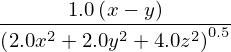

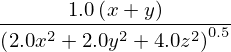

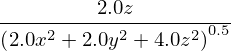

In [35]:
h_using_B = txyz.add(k_only_x).add(k_only_y).add(only_z).vector()
abs_of_h_using_B = h_using_B.abs_of_q()
h_B = h_using_B.divide_by(abs_of_h_using_B)
h_B.simple_q().display_q("h written in terms of B")

Show it works.

In [38]:
B_by_h_B = txyz.rotation_and_or_boost(h_B)
B_by_h_B.simple_q().print_state("B by h_B")

B by h_B
(t, -y, x, z) 



Bingo, bingo.

What I have not come to terms with yet is if this rotation using just B transformed is a good or bad sort of thing. I am quite suspicious of "good and bad" judgements in theoretical physics. Those show only biases based on a particular educational arc. One is rotating B using the B transformed and not other variables. This feels self-referential. It does work which is a good thing. If one writes all this out explicitly included the details of rotation_and_or_boost() fuction, it would look insane.

## Conclusions

Due to all the data presented in these two notebooks, I remain convinced that the Rodrigues generalization found by Dr. Kharinov and myself can do both boosts and pure 3D rotations. The simplest general way to see that is a quaternion of the form $h=(0, a, b, c)$ is a member of SU(2) so can do all rotations.

I am thankful that Purple Penguin was as stubburn as he remains to this day (direct email was not replied to from which I conclude nothing, life can be complicated). 

The major insights into physics obtained concerns what in math terms is a base space and a tangent space, and in physics terms is space-time and energy-momentum. One of the guiding ideas in python the computer language is the need to be explicit about the terms being used. I was in the habbit of not being clear about the difference between space-time, $(t, R)$ and its tangent space, $(dt, dR)$. I did not think about the difference, sometimes using one, sometimes the other. When I finally noticed how arbitrary I was regarding this clear difference, it bothered me. Nature is not arbitrary!